In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import prep
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('new_car_sales.csv')

In [3]:
df.head()

,Year,total_production
0,1960-01-01,7894
1,1965-01-01,11114
2,1970-01-01,8263
3,1975-01-01,8965
4,1980-01-01,8011


In [4]:
df.dtypes

Year                object
total_production     int64
dtype: object

In [5]:
df.Year = pd.to_datetime(df.Year)

In [6]:
df = df.set_index("Year")

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose


y = df.total_production.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


ValueError: This function does not handle missing values

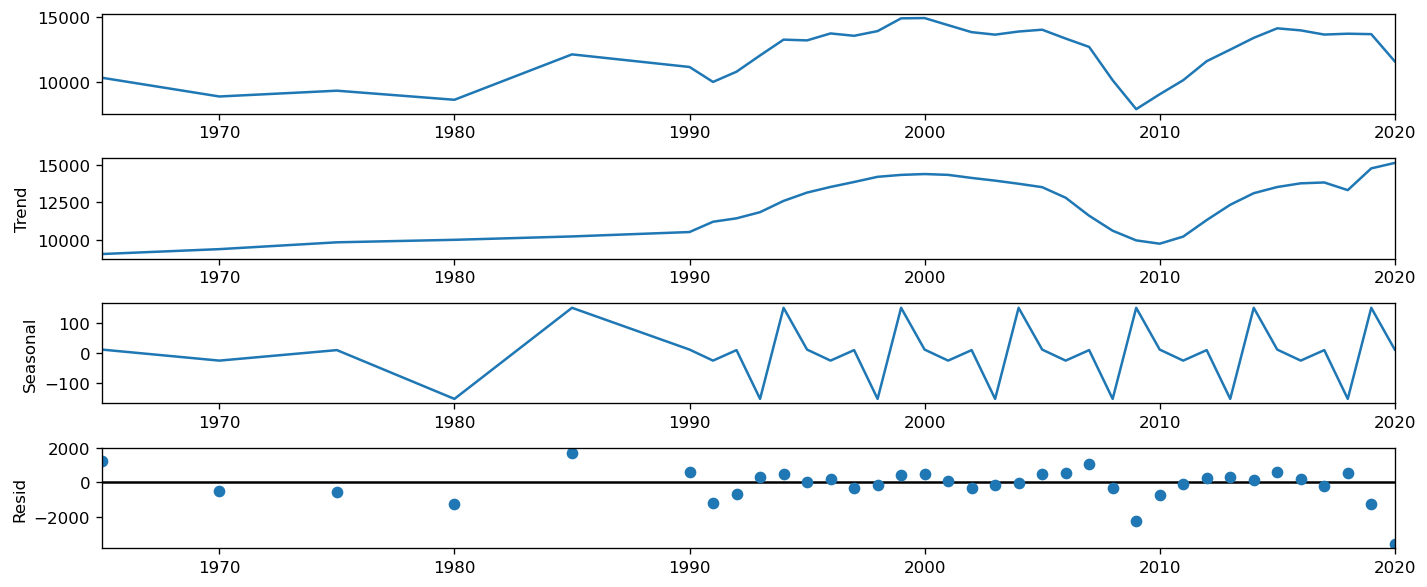

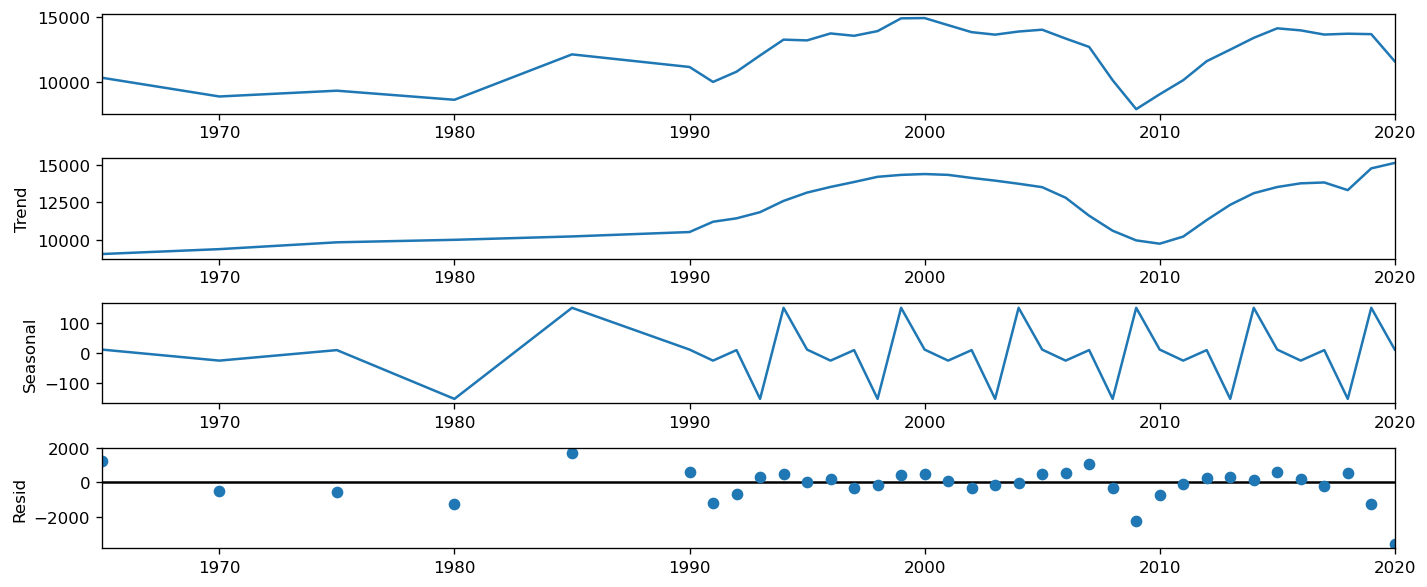

In [147]:
#df.plot()


result = seasonal_decompose(df, model='ad', extrapolate_trend='freq', period = 5)

from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot()

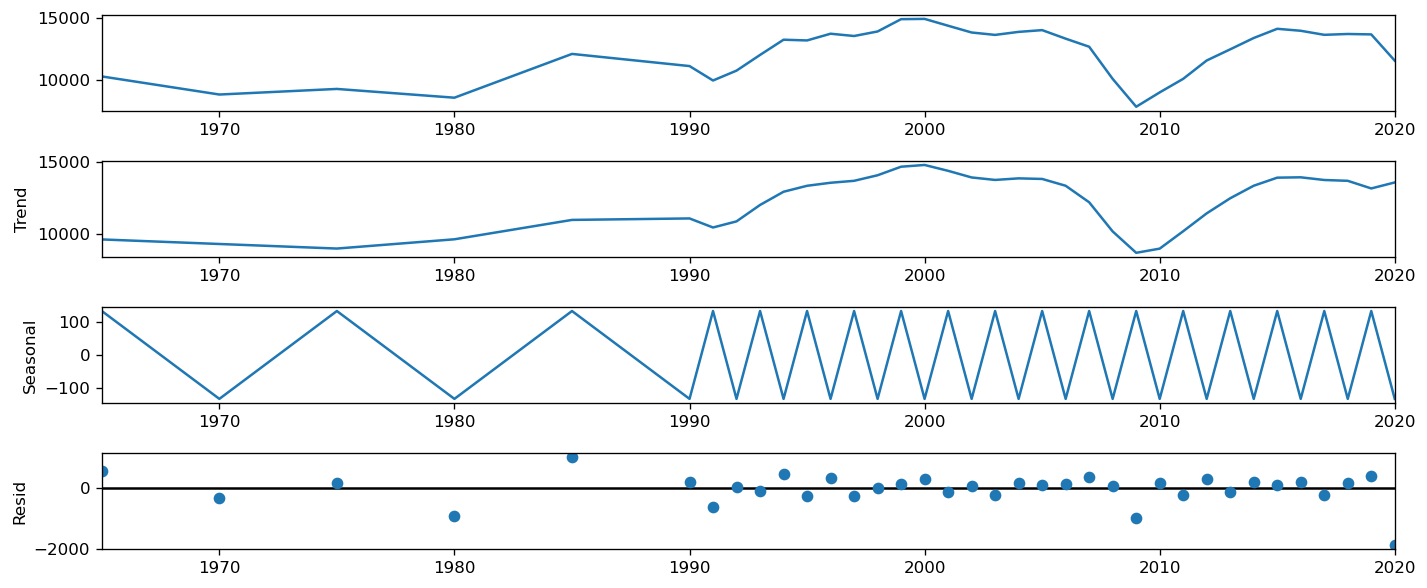

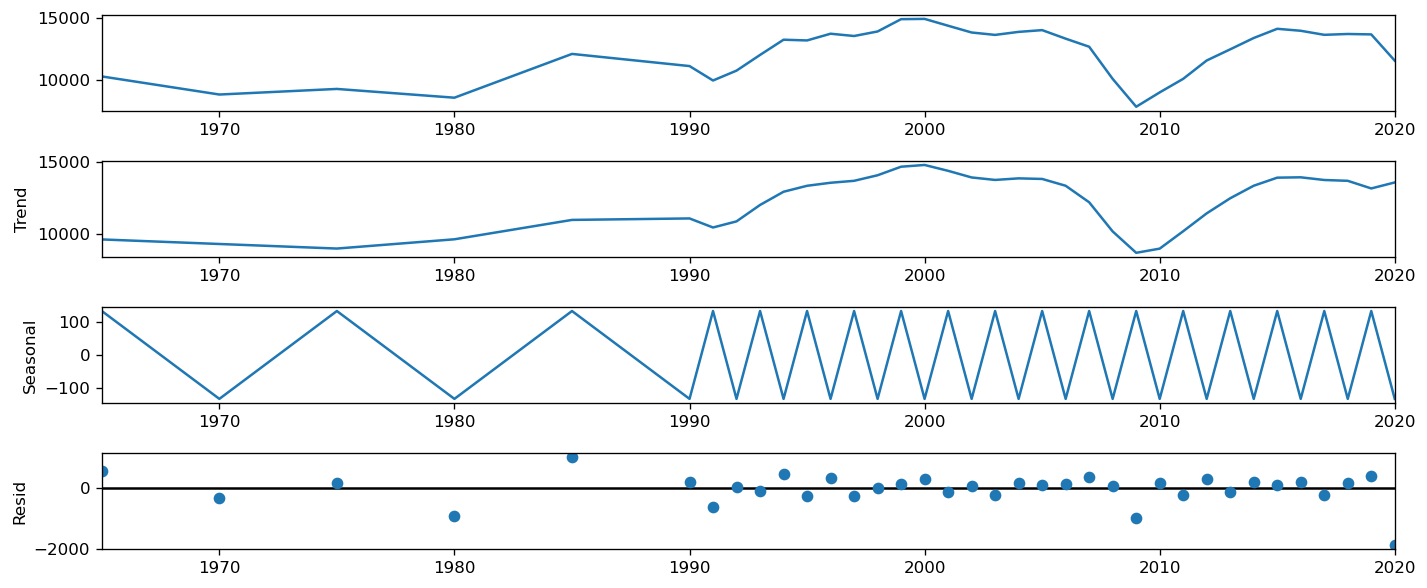

In [148]:
result = seasonal_decompose(df, model='ad', extrapolate_trend='freq', period = 2)

from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot()

In [19]:
df.index.isnull().sum()

0

In [7]:
train, test = prep.train_test_split(df)

In [149]:
train.shape, test.shape

((25, 1), (11, 1))

In [112]:
train.set_index("Year").sort_index()

,total_production
Year,
1960-01-01,7894
1965-01-01,11114
1970-01-01,8263
1975-01-01,8965
1980-01-01,8011
1985-01-01,11638
1990-01-01,9767
1991-01-01,8790
1992-01-01,9691


In [128]:
train.head()

,total_sale
Year,
1965-01-01,10302
1970-01-01,8849
1975-01-01,9298
1980-01-01,8594
1985-01-01,12110


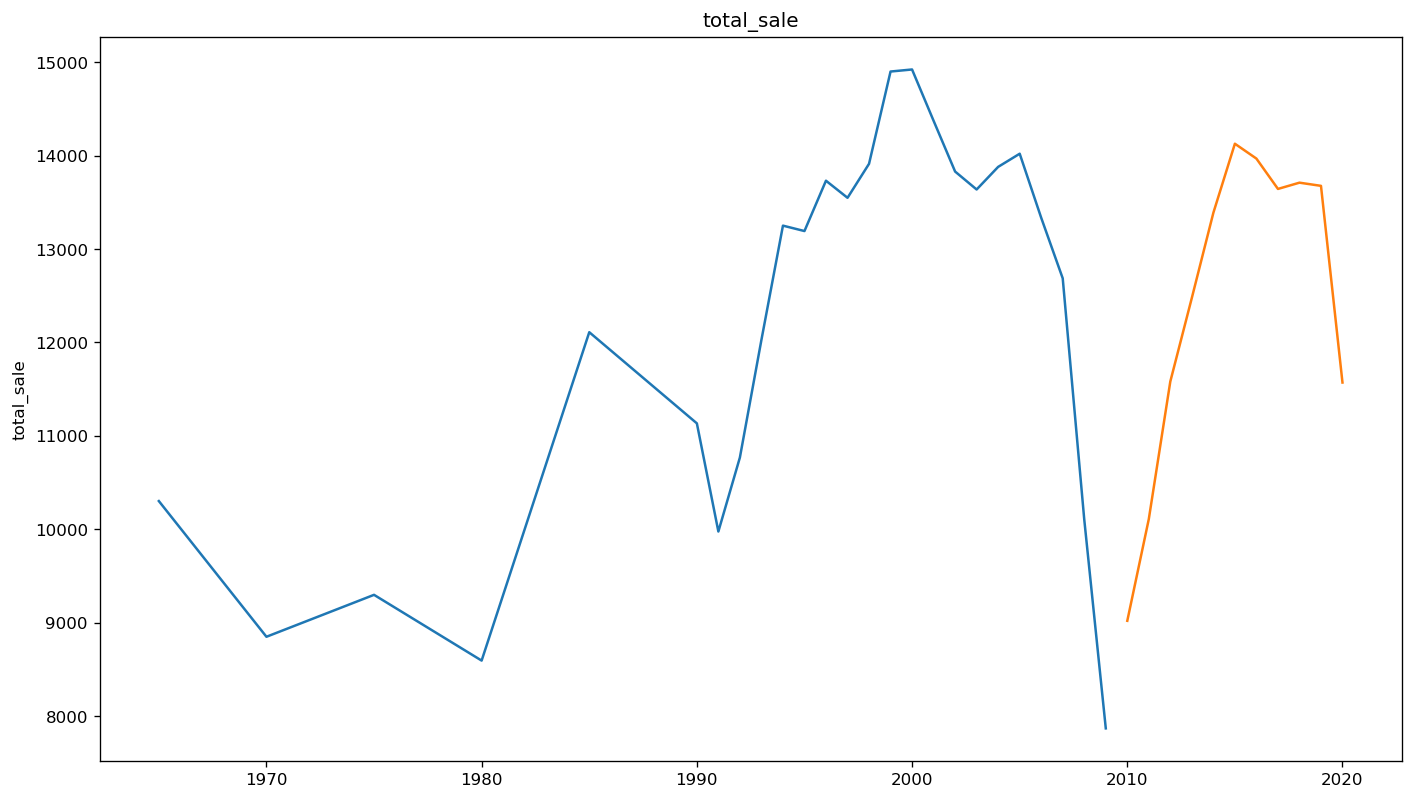

In [150]:
for col in train.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [162]:
test.columns

Index(['total_sale'], dtype='object')

In [145]:
from math import sqrt
from sklearn.metrics import mean_squared_error
# evaluation function to compute rmse
def evaluate(target_var):
    
    rmse = round(sqrt(mean_squared_error(test[target_var], yhat_df[target_var])), 0)
    return rmse


In [133]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(test[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = test(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


In [169]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)


#  Starting Predictions and Baselines
---

Forming a baseline by using a simple average: Our simple average baseline is 12170.48

In [151]:
train['total_sale'][-1:][0]

7868

The Last obeserved value is 7868. We can use this to predict all future new car sales will be equal to 7868

In [153]:
# Assigning last observade value to a variable.
last_sale = train['total_sale'][-1:][0]
last_sale

7868

Adding last sale to a yhat dataframe to visualize later

In [157]:
yhat_df = pd.DataFrame(
    {'total_sale': [last_sale]},
    index=test.index)

yhat_df.head()

,total_sale
Year,
2010-01-01,7868
2011-01-01,7868
2012-01-01,7868
2013-01-01,7868
2014-01-01,7868


TypeError: 'DataFrame' object is not callable

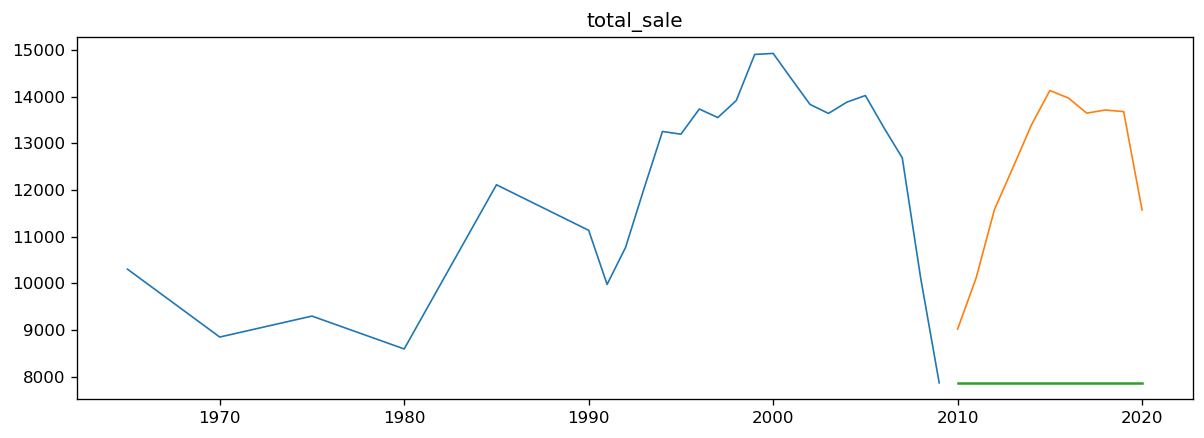

In [166]:
plot_and_eval('total_sale')


# Evaluate

Evaluate using MSE and RMSE, and add evaluation metrics to eval_df

In [170]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)

eval_df

,model_type,target_var,rmse
0,last_observed_value,total_sale,4892.0


# Making a simple average forecast

In [173]:

avg_sales = round(train['total_sale'].mean(), 2)

avg_sales


12170.48

In [174]:
def make_predictions(sales=None, quantity=None):
    yhat_df = pd.DataFrame({'total_sale': [avg_sales]},
                          index=test.index)
    return yhat_df

In [176]:
yhat_df = make_predictions(avg_sales)
yhat_df

,total_sale
Year,
2010-01-01,12170.48
2011-01-01,12170.48
2012-01-01,12170.48
2013-01-01,12170.48
2014-01-01,12170.48
2015-01-01,12170.48
2016-01-01,12170.48
2017-01-01,12170.48
2018-01-01,12170.48


In [178]:
yhat_df.describe()

,total_sale
count,1.100000e+01
mean,1.217048e+04
std,1.907772e-12
min,1.217048e+04
25%,1.217048e+04
50%,1.217048e+04
75%,1.217048e+04
max,1.217048e+04


All the values are the same. This is to be expected because we predicted that the sales would just be the simple average

TypeError: 'DataFrame' object is not callable

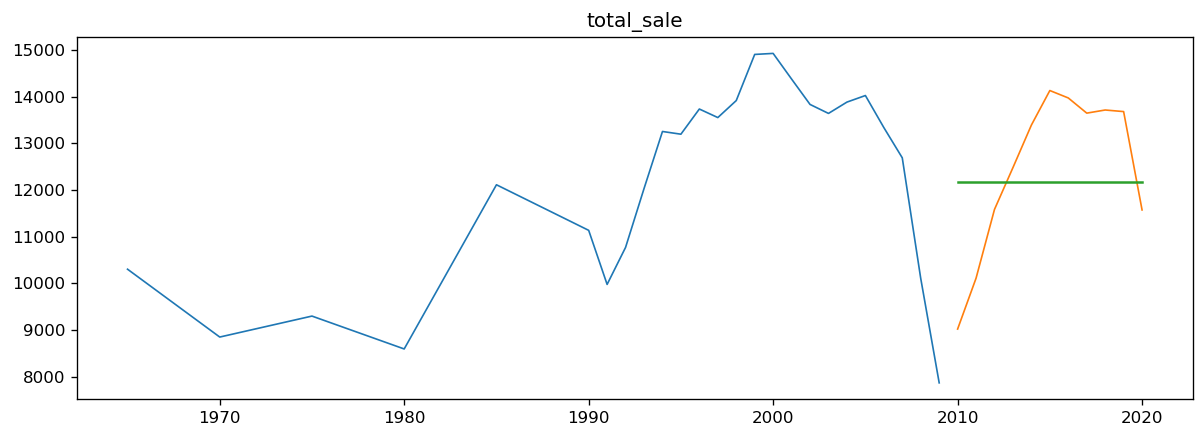

In [179]:
for col in train.columns:
    plot_and_eval(col)

In [180]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                            target_var = col)
eval_df

,model_type,target_var,rmse
0,last_observed_value,total_sale,4892.0
1,simple_average,total_sale,1661.0


# Moving Average

In [182]:
# demonstrate that the mean of the first 30 days 
# is equal to rolling(30) on day 30

print(train['total_sale'].rolling(5).mean())

Year
1965-01-01        NaN
1970-01-01        NaN
1975-01-01        NaN
1980-01-01        NaN
1985-01-01     9830.6
1990-01-01     9997.0
1991-01-01    10222.4
1992-01-01    10516.4
1993-01-01    11203.4
1994-01-01    11431.6
1995-01-01    11843.4
1996-01-01    12594.6
1997-01-01    13150.8
1998-01-01    13527.6
1999-01-01    13857.6
2000-01-01    14203.6
2001-01-01    14331.8
2002-01-01    14388.0
2003-01-01    14333.0
2004-01-01    14128.8
2005-01-01    13948.4
2006-01-01    13740.8
2007-01-01    13512.2
2008-01-01    12806.2
2009-01-01    11603.8
Name: total_sale, dtype: float64


Looking 

In [ ]:
period=30
train['sales_total'].rolling(period).mean()[-1]

In [16]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.total_production.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.041995
p-value: 0.268468


 Now I am checking the p value and it looks like its greater than 0.05 significance 

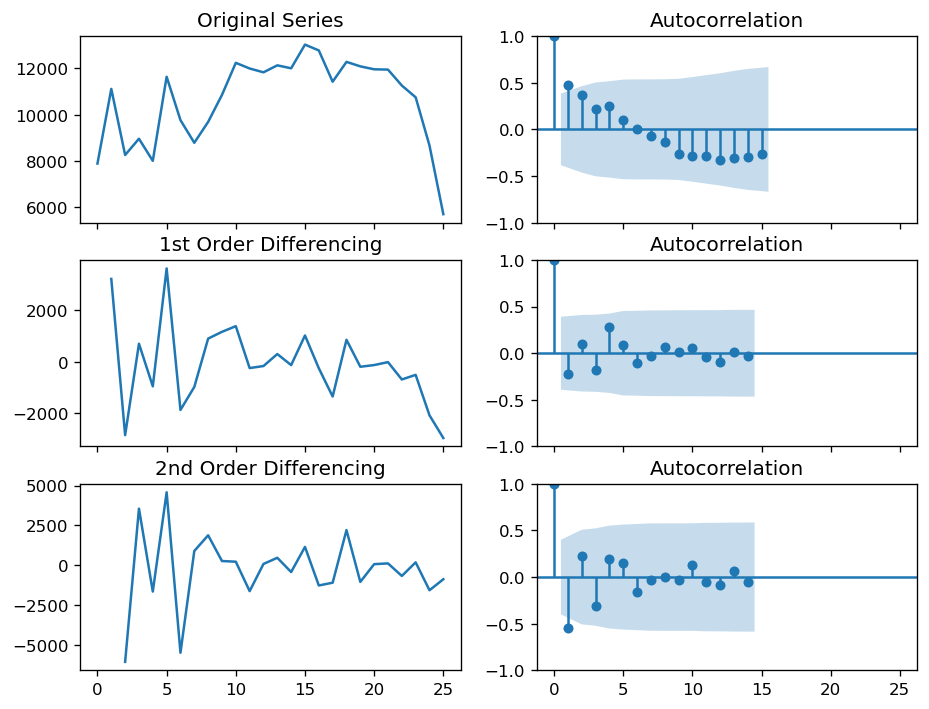

In [18]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})



# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train.total_production); axes[0, 0].set_title('Original Series')
plot_acf(train.total_production, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(train.total_production.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(train.total_production.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(train.total_production.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train.total_production.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.
For the above series, the time series reaches stationarity with two orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.

In [22]:
from pmdarima.arima.utils import ndiffs

y = df.total_production

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

1

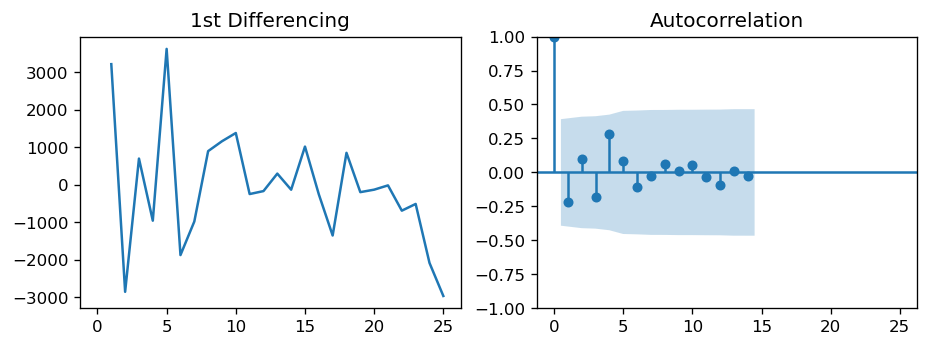

In [23]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})



fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train.total_production.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(train.total_production.diff().dropna(), ax=axes[1])

plt.show()

In [27]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(train.total_production, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       total_production   No. Observations:                   26
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -218.577
Date:                Thu, 15 Sep 2022   AIC                            443.155
Time:                        15:31:44   BIC                            446.811
Sample:                             0   HQIC                           444.169
                                 - 26                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8996      0.129     -6.990      0.000      -1.152      -0.647
ma.L1          1.0000      0.263      3.797      0.000       0.484       1.516
sigma2      2.303e+06   1.14e-07   2.01e+13      0.0

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


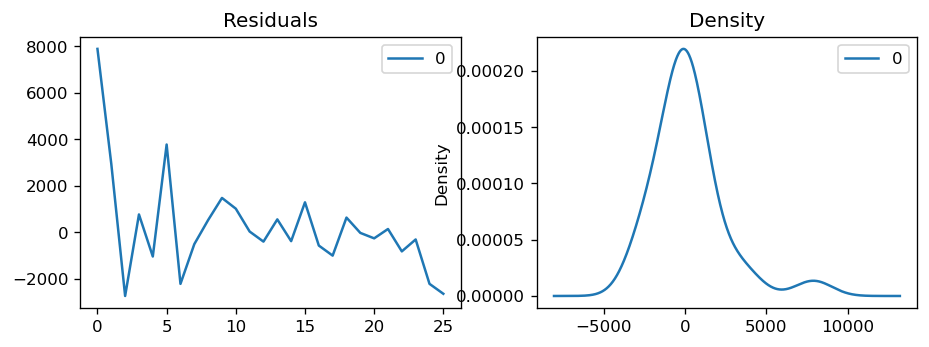

In [28]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<AxesSubplot:>

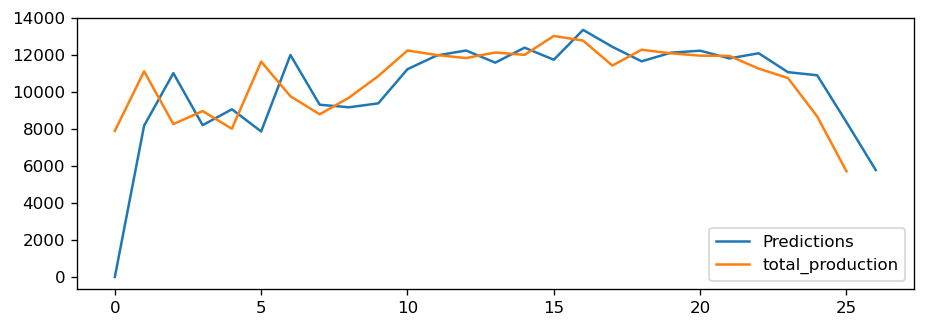

In [98]:
start = 0
end = len(train)
  
# Predictions for one-year against the train set
predictions = model_fit.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
train['total_production'].plot(legend = True)

<AxesSubplot:>

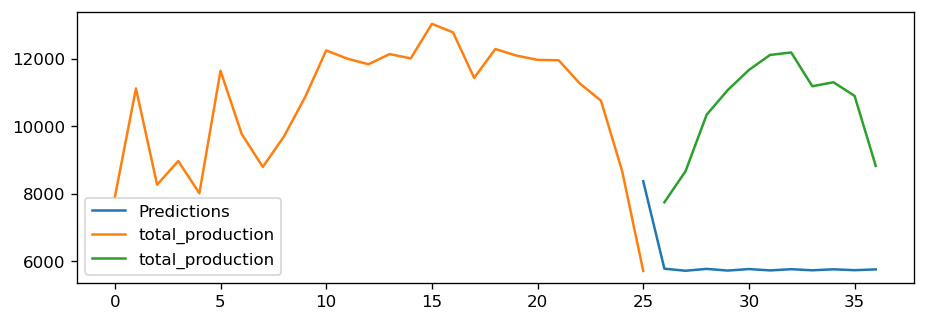

In [107]:
start = 25
end = 36
  
# Predictions for one-year against the train set
predictions = model_fit.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
train['total_production'].plot(legend = True)
test['total_production'].plot(legend = True)

In [91]:
model = ARIMA(train.total_production, order=(1, 1, 1))  
fitted = model.fit()  

# Forecast
conf = fitted.get_forecast(15, alpha=0.05)  # 95% conf

forecasted = fitted.get_predictions(15, alpha=0.05)  # 95% conf


conf


/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AttributeError: 'ARIMAResults' object has no attribute 'get_predictions'

In [92]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train.total_production, order=(1, 1, 1))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.get_predictions(15, alpha=0.05)  # 95% conf




#conf = str(conf)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AttributeError: 'ARIMAResults' object has no attribute 'get_predictions'

In [ ]:
from pyramid.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(series)
train, test = series[1:500], series[501:910]
train.shape
test.shape
plt.plot(train)
plt.plot(test)
plt.title("Pyramid")
plt.show()

In [51]:
mod = sm.tsa.statespace.SARIMAX(train.total_production, trend='n', order=(1,1,1), seasonal_order=(1,1,1,2))
results = mod.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.74511D+00    |proj g|=  2.42535D-01

At iterate    5    f=  7.71165D+00    |proj g|=  3.20032D-02

At iterate   10    f=  7.70968D+00    |proj g|=  1.91425D-03

At iterate   15    f=  7.70938D+00    |proj g|=  3.03473D-03

At iterate   20    f=  7.70937D+00    |proj g|=  5.44542D-04

At iterate   25    f=  7.70816D+00    |proj g|=  3.14166D-02

At iterate   30    f=  7.68278D+00    |proj g|=  3.86340D-02

At iterate   35    f=  7.67940D+00    |proj g|=  5.77223D-03

At iterate   40    f=  7.67878D+00    |proj g|=  8.48825D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                  total_production   No. Observations:                   26
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 2)   Log Likelihood                -199.648
Date:                           Fri, 16 Sep 2022   AIC                            409.296
Time:                                   11:45:30   BIC                            414.973
Sample:                                        0   HQIC                           410.724
                                            - 26                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6726      2.741      0.245      0.806      -4.700       6.045
ma.L1         -0.7120      2.657     -0.268      0.789      -5.921       4.497
ar.S.L2       -0.6224      0.300     -2.073      0.038      -1.211      -0.034
ma.S.L2        0.2502      0.379      0.660      0.509      -0.493       0.993
sigma2      1.939e+06   8.84e+05      2.192      0.028    2.05e+05    3.67e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.48   Prob(JB):                         0.72
Heteroskedasticity (H):               0.54   Skew:                            -0.21
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

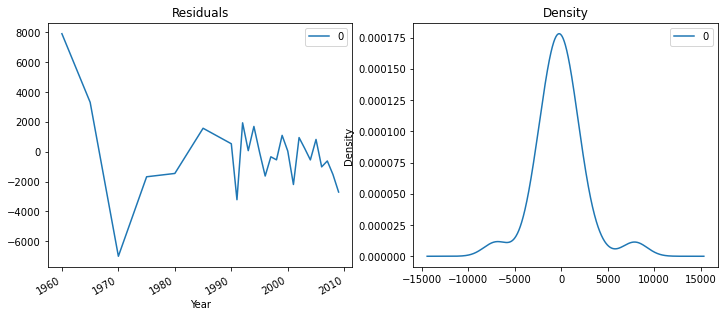

In [52]:
# Plot residual errors
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Year'>

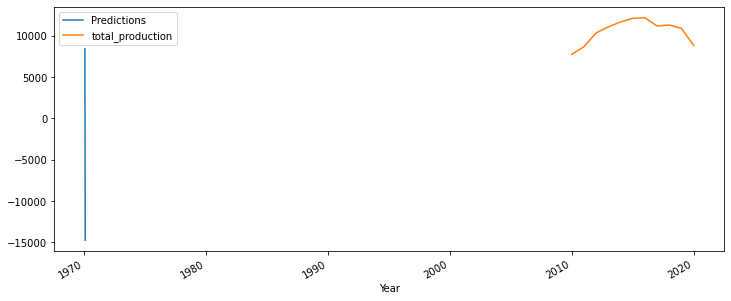

In [55]:
start = 25
end = 36
  
# Predictions for one-year against the train set
predictions = results.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['total_production'].plot(legend = True)

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['total_production'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 10))
  
result = model.fit()
result.summary()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.17757D+00    |proj g|=  2.02203D-01

At iterate    5    f=  5.07803D+00    |proj g|=  9.72332D-03

At iterate   10    f=  5.07628D+00    |proj g|=  1.01867D-04

At iterate   15    f=  5.07627D+00    |proj g|=  2.55313D-03

At iterate   20    f=  5.07464D+00    |proj g|=  2.89768D-02

At iterate   25    f=  5.04908D+00    |proj g|=  6.16888D-02

At iterate   30    f=  5.03871D+00    |proj g|=  3.59659D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   total_production   No. Observations:                   26
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 10)   Log Likelihood                -131.007
Date:                            Fri, 16 Sep 2022   AIC                            272.013
Time:                                    13:49:19   BIC                            275.553
Sample:                                         0   HQIC                           271.975
                                             - 26                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2429      0.385      0.631      0.528      -0.511       0.997
ar.S.L10      -0.7360      1.554     -0.474      0.636      -3.781       2.309
ar.S.L20      -0.8363      0.277     -3.019      0.003      -1.379      -0.293
ma.S.L10       0.2350      4.886      0.048      0.962      -9.341       9.811
sigma2      1.148e+06   1.53e-05    7.5e+10      0.000    1.15e+06    1.15e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.21
Prob(Q):                              0.82   Prob(JB):                         0.90
Heteroskedasticity (H):               2.11   Skew:                            -0.29
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.38e+27. Standard errors may be unstable.
"""

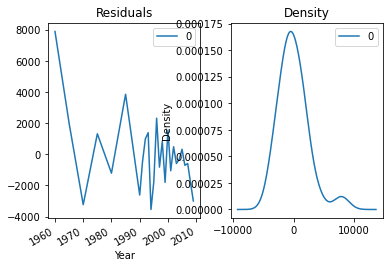

In [11]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Year'>

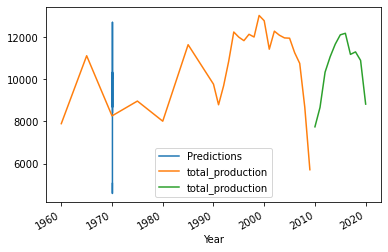

In [12]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
train['total_production'].plot(legend = True)
test['total_production'].plot(legend = True)

predictions

In [21]:
predictions.RangeIndex(start=1986, stop=2015, step=1)

AttributeError: 'Series' object has no attribute 'RangeIndex'

<AxesSubplot:xlabel='Year'>

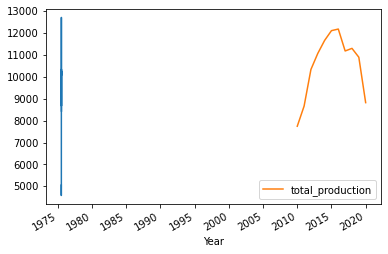

In [29]:
predictions.plot()
test['total_production'].plot(legend = True)

In [33]:
test.index

DatetimeIndex(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [34]:
predictions.index = test.index

In [35]:
predictions.index

DatetimeIndex(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

<AxesSubplot:xlabel='Year'>

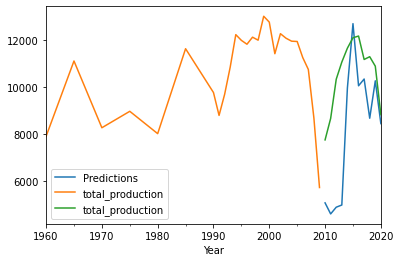

In [36]:
# start = len(train)
# end = len(train) + len(test) - 1
  
# # Predictions for one-year against the test set
# predictions = result.predict(start, end,
#                              typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
train['total_production'].plot(legend = True)
test['total_production'].plot(legend = True)


In [184]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=203.411, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=197.112, Time=0.20 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=203.039, Time=0.01 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=199.072, Time=0.36 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(0,2,0)(1,1,0)[12]             : AIC=195.220, Time=0.09 sec
 ARIMA(0,2,0)(2,1,0)[12]             : AIC=197.187, Time=0.41 sec
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=197.187, Time=0.31 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(2,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=197.138, Time=0.24

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   25
Model:             SARIMAX(0, 2, 0)x(1, 1, 0, 12)   Log Likelihood                 -94.316
Date:                            Mon, 19 Sep 2022   AIC                            194.632
Time:                                    15:26:51   BIC                            195.825
Sample:                                         0   HQIC                           193.879
                                             - 25                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -610.8564    386.256     -1.581      0.114   -1367.904     146.192
ar.S.L12      -0.8582      0.154     -5.583      0.000      -1.160      -0.557
sigma2      6.479e+05   8.22e+05      0.788      0.431   -9.63e+05    2.26e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.25
Prob(Q):                              0.95   Prob(JB):                         0.88
Heteroskedasticity (H):               0.94   Skew:                            -0.04
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""